# Evaluation Project - 1 Baseball Case Study Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
#Importing Liabraries amd models and metrics for analysis and model creation
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Impoting fiels
df=pd.read_csv("baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
#converitng file into a dataframe
df=pd.DataFrame(data=df)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
#Introducing proper column nanmes for better understanding and alalysis
df.rename(columns={"W":"Win","R":"Runs_scored","AB":"At_bat","H":"Hit","2B":"Double","3B":"Triple","HR":"Home_runs","BB":"Base_on_balls","SO":"Strikeout","SB":"Stolen_base","RA":"Run_average","ER":"Earned_run","ERA":"Earned_run_average","CG":"Complete_game","SHO":"Shutout","SV":"Save","E":"Errors"},inplace=True)

In [5]:
df

,Win,Runs_scored,At_bat,Hit,Double,Triple,Home_runs,Base_on_balls,Strikeout,Stolen_base,Run_average,Earned_run,Earned_run_average,Complete_game,Shutout,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Exploratory data analysis for better understaning the data

In [6]:
df.shape

(30, 17)

In [7]:
df.dtypes

Win                     int64
Runs_scored             int64
At_bat                  int64
Hit                     int64
Double                  int64
Triple                  int64
Home_runs               int64
Base_on_balls           int64
Strikeout               int64
Stolen_base             int64
Run_average             int64
Earned_run              int64
Earned_run_average    float64
Complete_game           int64
Shutout                 int64
Save                    int64
Errors                  int64
dtype: object

In [8]:
df.isnull().sum() #no null values

Win                   0
Runs_scored           0
At_bat                0
Hit                   0
Double                0
Triple                0
Home_runs             0
Base_on_balls         0
Strikeout             0
Stolen_base           0
Run_average           0
Earned_run            0
Earned_run_average    0
Complete_game         0
Shutout               0
Save                  0
Errors                0
dtype: int64

<AxesSubplot:>

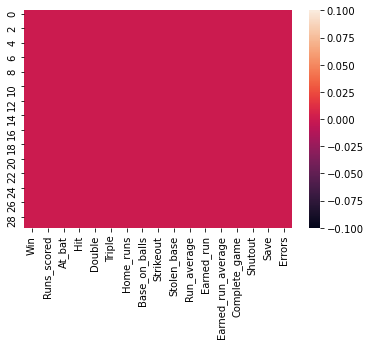

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,Win,Runs_scored,At_bat,Hit,Double,Triple,Home_runs,Base_on_balls,Strikeout,Stolen_base,Run_average,Earned_run,Earned_run_average,Complete_game,Shutout,Save,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [11]:
#by seeing this data we can understand that there are the prescence of the oltliers in the data. let's check them. 

<AxesSubplot:>

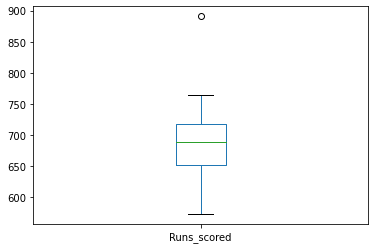

In [12]:
df["Runs_scored"].plot.box()

Win                      AxesSubplot(0.125,0.772143;0.227941x0.107857)
Runs_scored           AxesSubplot(0.398529,0.772143;0.227941x0.107857)
At_bat                AxesSubplot(0.672059,0.772143;0.227941x0.107857)
Hit                      AxesSubplot(0.125,0.642714;0.227941x0.107857)
Double                AxesSubplot(0.398529,0.642714;0.227941x0.107857)
Triple                AxesSubplot(0.672059,0.642714;0.227941x0.107857)
Home_runs                AxesSubplot(0.125,0.513286;0.227941x0.107857)
Base_on_balls         AxesSubplot(0.398529,0.513286;0.227941x0.107857)
Strikeout             AxesSubplot(0.672059,0.513286;0.227941x0.107857)
Stolen_base              AxesSubplot(0.125,0.383857;0.227941x0.107857)
Run_average           AxesSubplot(0.398529,0.383857;0.227941x0.107857)
Earned_run            AxesSubplot(0.672059,0.383857;0.227941x0.107857)
Earned_run_average       AxesSubplot(0.125,0.254429;0.227941x0.107857)
Complete_game         AxesSubplot(0.398529,0.254429;0.227941x0.107857)
Shutou

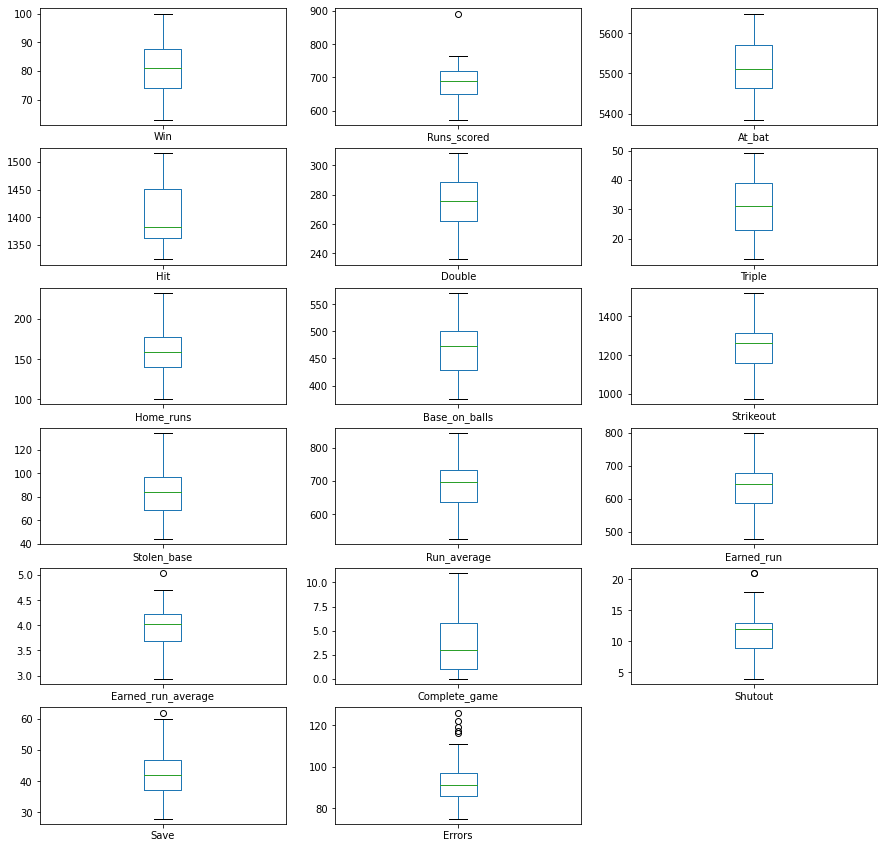

In [13]:
df.plot(kind="box",subplots=True,layout=(6,3),figsize=(15,15))

In [14]:
#checking skewness
df.skew()

Win                   0.047089
Runs_scored           1.200786
At_bat                0.183437
Hit                   0.670254
Double               -0.230650
Triple                0.129502
Home_runs             0.516441
Base_on_balls         0.158498
Strikeout            -0.156065
Stolen_base           0.479893
Run_average           0.045734
Earned_run            0.058710
Earned_run_average    0.053331
Complete_game         0.736845
Shutout               0.565790
Save                  0.657524
Errors                0.890132
dtype: float64

In [15]:
df.skew()

Win                   0.047089
Runs_scored           1.200786
At_bat                0.183437
Hit                   0.670254
Double               -0.230650
Triple                0.129502
Home_runs             0.516441
Base_on_balls         0.158498
Strikeout            -0.156065
Stolen_base           0.479893
Run_average           0.045734
Earned_run            0.058710
Earned_run_average    0.053331
Complete_game         0.736845
Shutout               0.565790
Save                  0.657524
Errors                0.890132
dtype: float64

<AxesSubplot:ylabel='Frequency'>

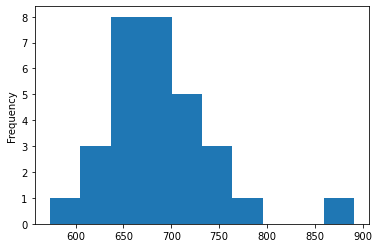

In [16]:
df["Runs_scored"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

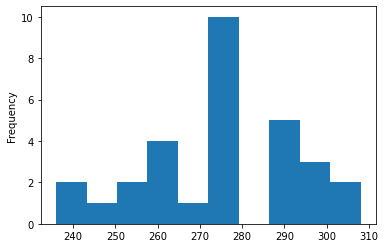

In [17]:
df["Double"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

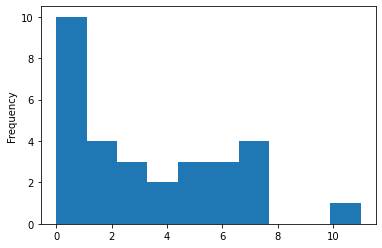

In [18]:
df["Complete_game"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

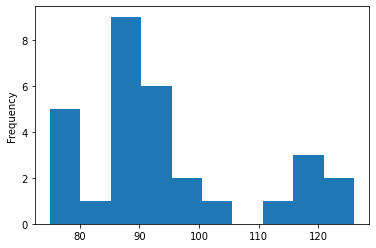

In [19]:
df["Errors"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

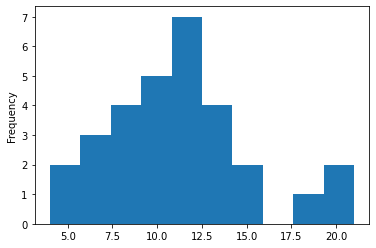

In [20]:
df["Shutout"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

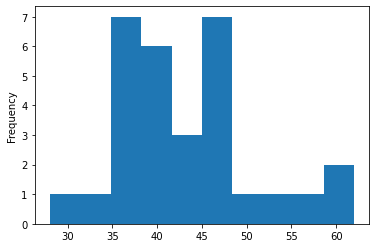

In [21]:
df["Save"].plot.hist()

<AxesSubplot:xlabel='Runs_scored', ylabel='Density'>

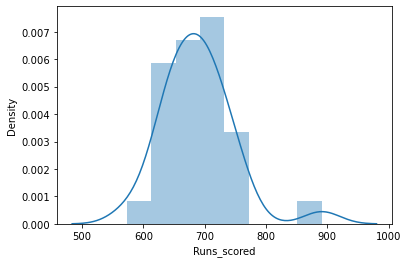

In [22]:
sns.distplot(df['Runs_scored'])

<AxesSubplot:xlabel='Errors', ylabel='Density'>

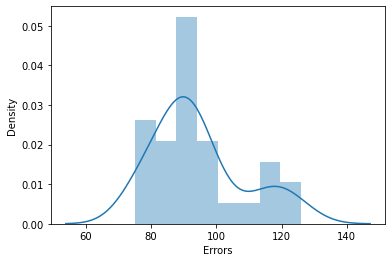

In [23]:
sns.distplot(df['Errors'])

<AxesSubplot:xlabel='Complete_game', ylabel='Density'>

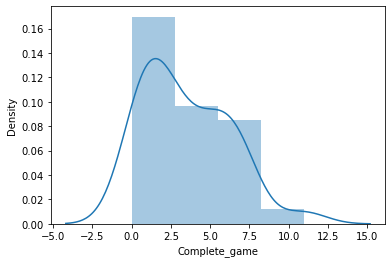

In [24]:
sns.distplot(df['Complete_game'])

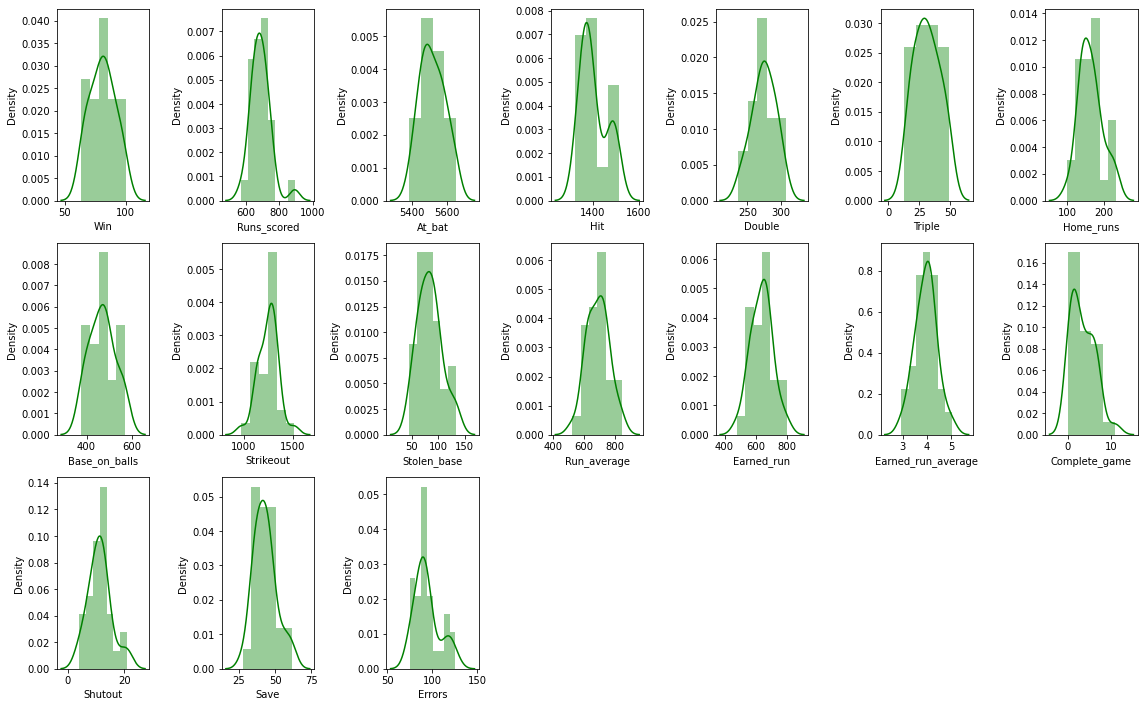

In [25]:
collist=df.columns.values
ncol=7
nrows=5
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

In [26]:
#it seems like that data is properly distributed and there is no need to remove skewness 

In [27]:
#Checking corelations and relations between the different between the columns  
df.corr()

,Win,Runs_scored,At_bat,Hit,Double,Triple,Home_runs,Base_on_balls,Strikeout,Stolen_base,Run_average,Earned_run,Earned_run_average,Complete_game,Shutout,Save,Errors
Win,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs_scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At_bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hit,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Double,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triple,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home_runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base_on_balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeout,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


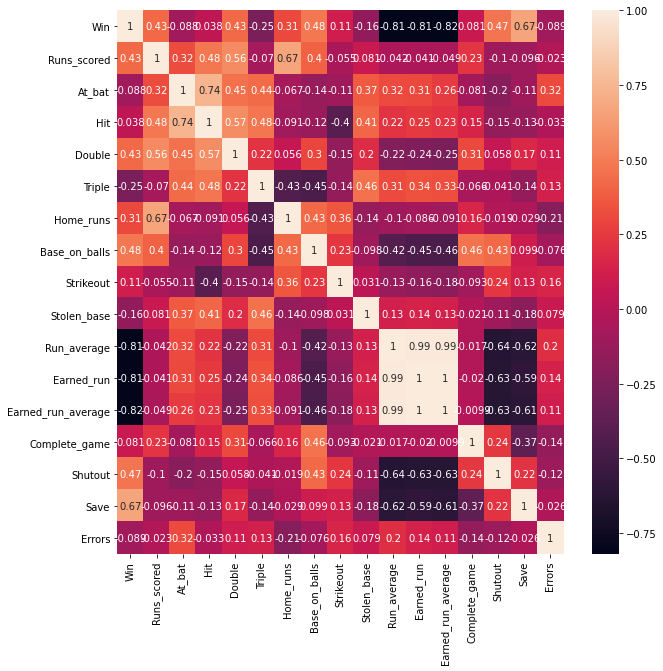

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

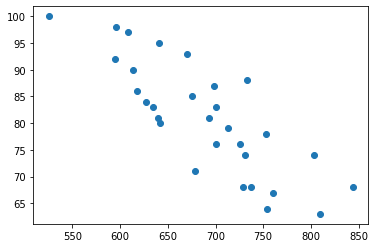

In [29]:
plt.scatter(df["Run_average"],df["Win"])
plt.show()

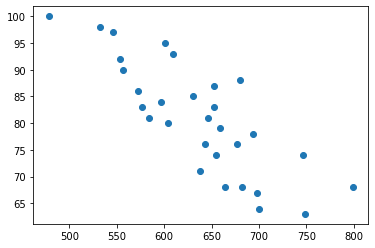

In [30]:
plt.scatter(df["Earned_run"],df["Win"])
plt.show()

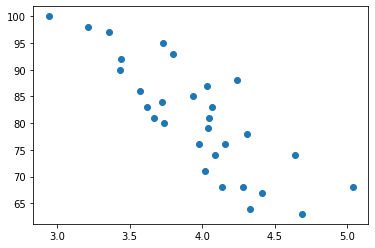

In [31]:
x=df["Earned_run_average"]
y=df["Win"]
plt.scatter(x,y)
plt.show()

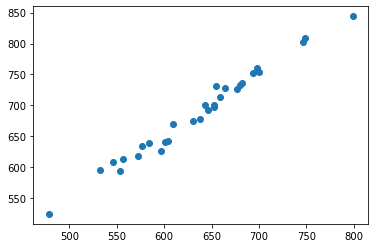

In [32]:
x=df["Earned_run"]
y=df["Run_average"]
plt.scatter(x,y)
plt.show()

In [33]:
# We can see that some of the data is highly proitively corrleated "earned run" and "run average" and some of the data is negatively correlated like "Run average" & "win" and "Earned Run and "Win". Since the data is very less lets not drop any of them. 

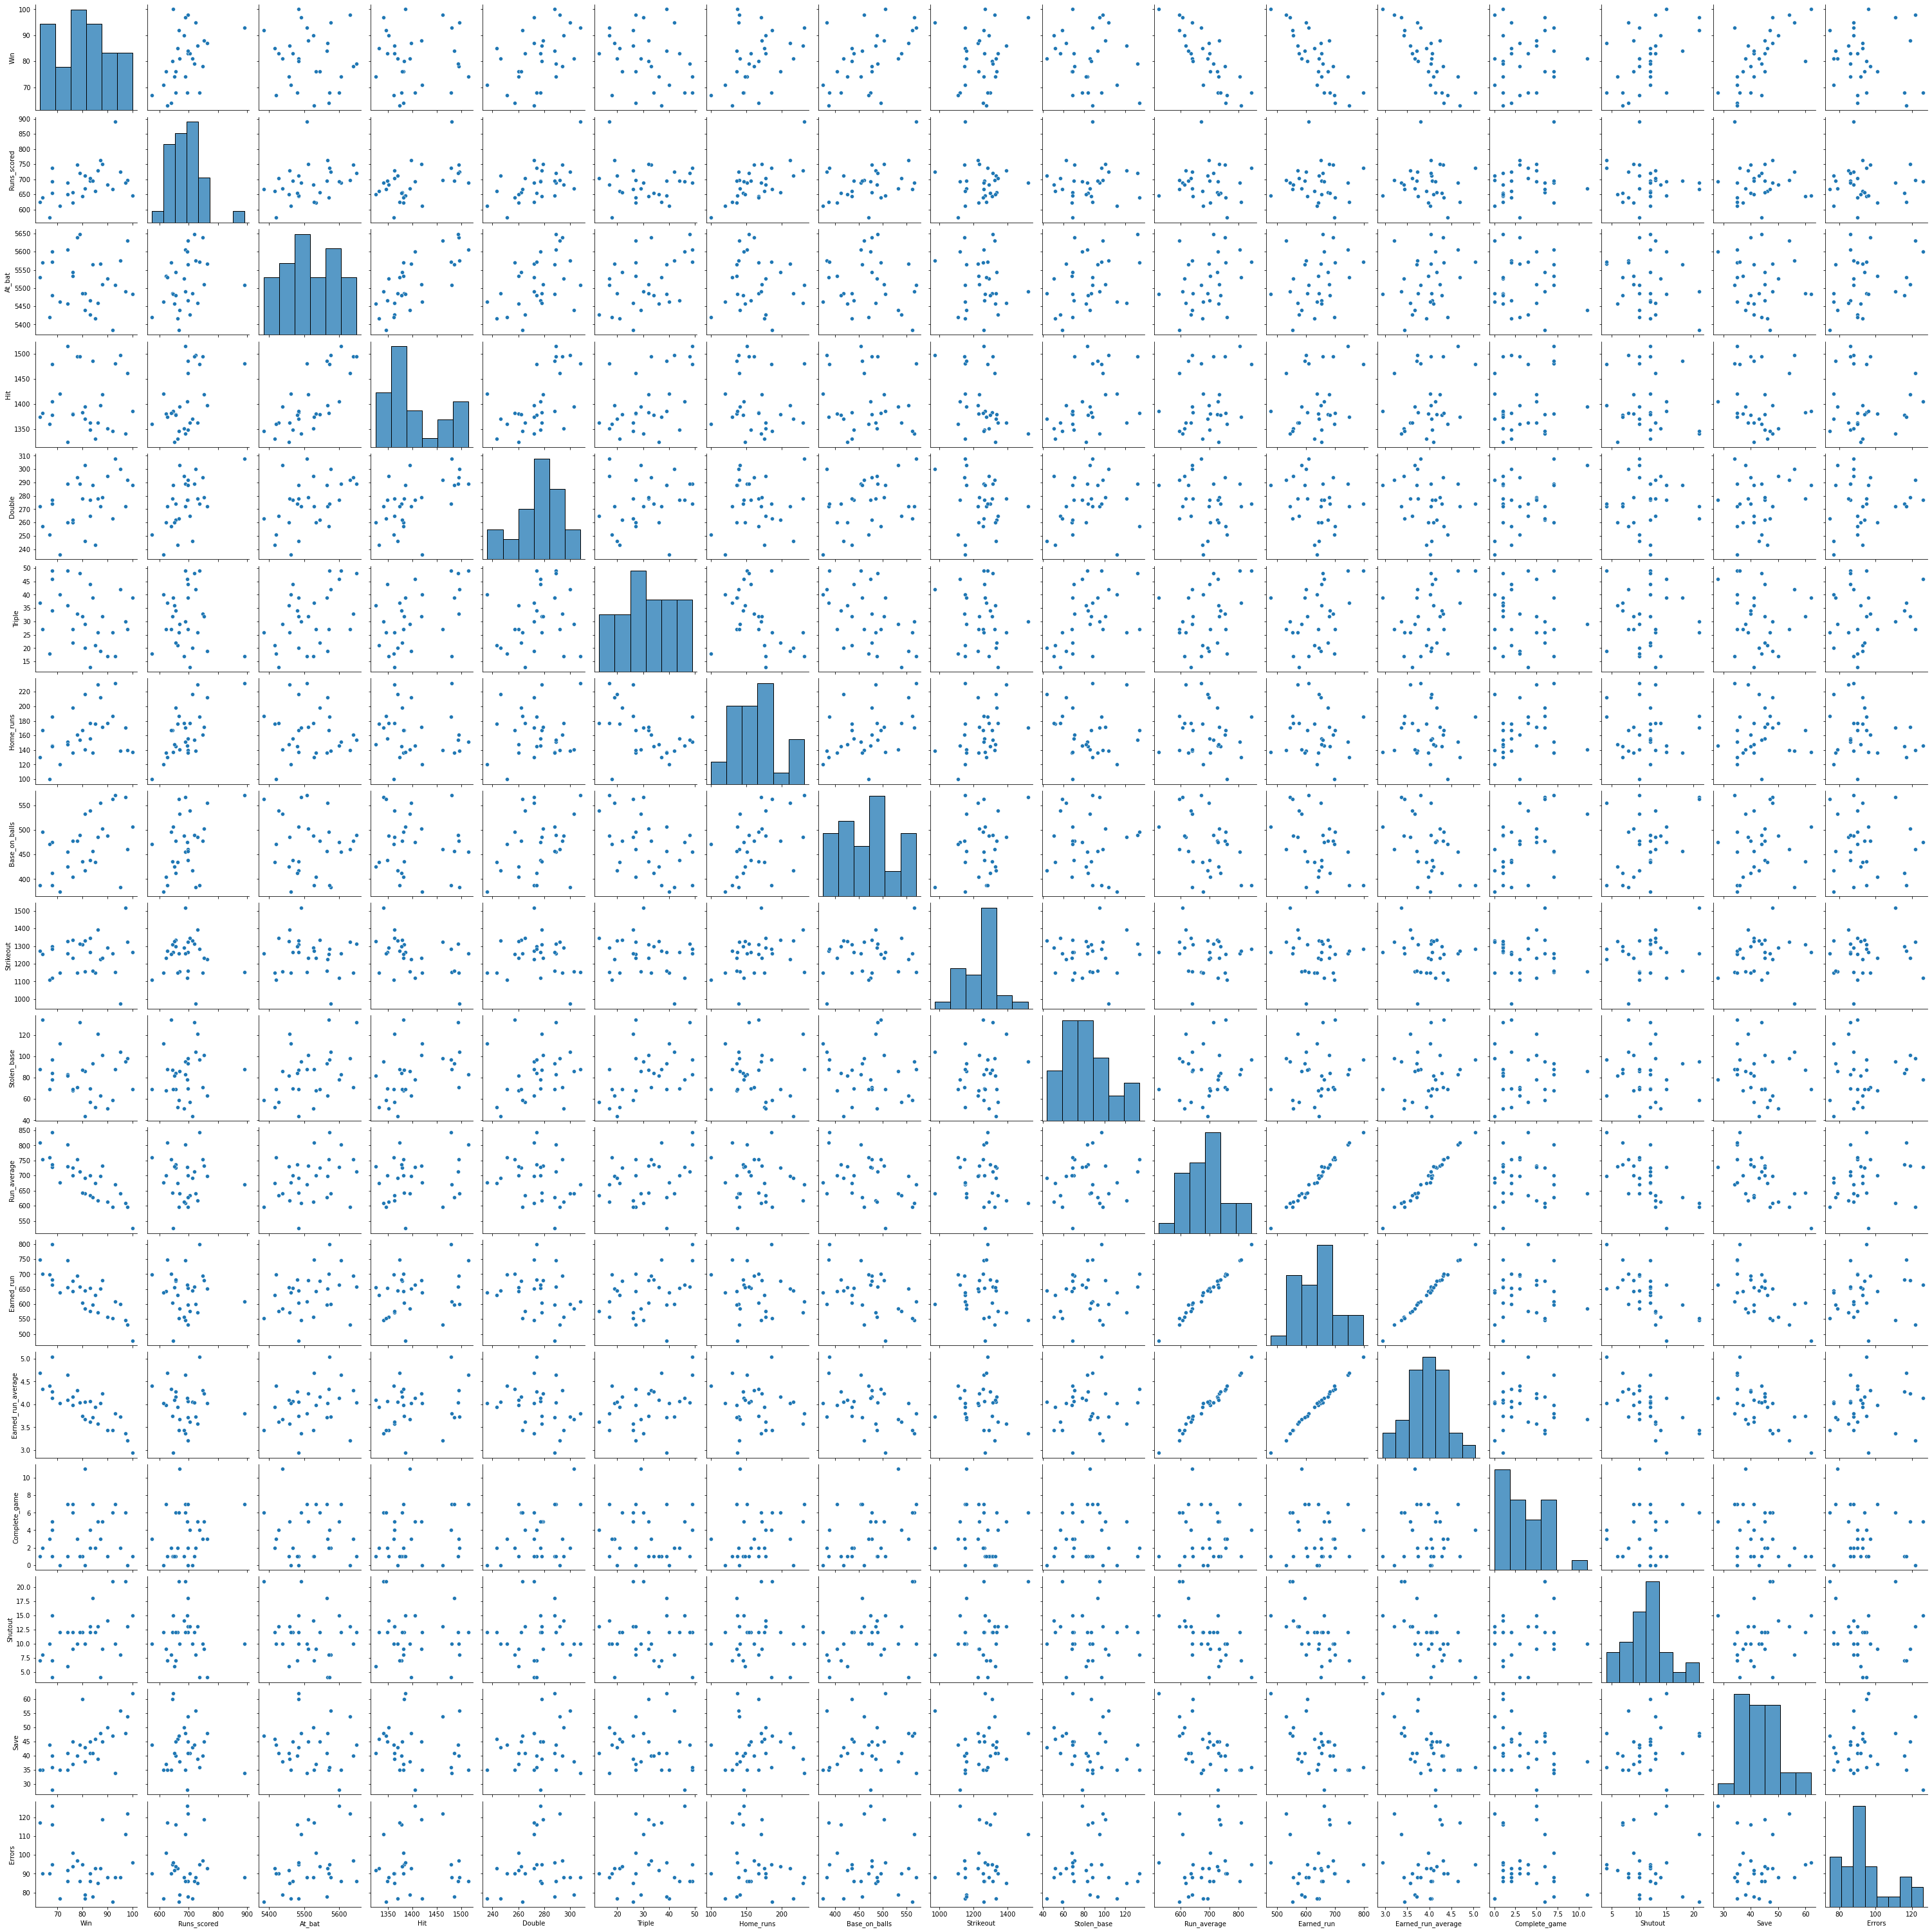

In [34]:
sns.pairplot(df)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Fr

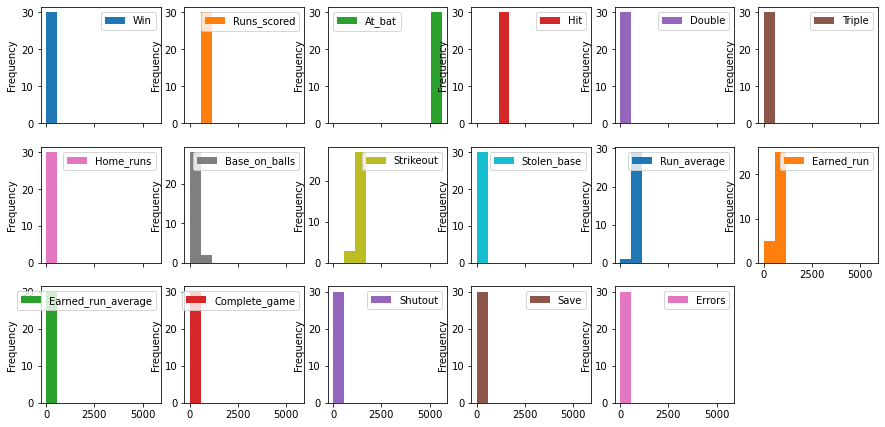

In [35]:
df.plot(kind="hist",subplots=True,layout=(6,6),figsize=(15,15))

In [36]:
#Importing zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [37]:
#removing outliers
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [38]:
df=df[(z<3).all(axis=1)]

In [39]:
df.shape

(29, 17)

In [40]:
#Now data is ready for the model anaylysis. We will test different model and find the suitable model for predictions. 

In [41]:
df

,Win,Runs_scored,At_bat,Hit,Double,Triple,Home_runs,Base_on_balls,Strikeout,Stolen_base,Run_average,Earned_run,Earned_run_average,Complete_game,Shutout,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [42]:
x=df.iloc[:,1:18]
x

,Runs_scored,At_bat,Hit,Double,Triple,Home_runs,Base_on_balls,Strikeout,Stolen_base,Run_average,Earned_run,Earned_run_average,Complete_game,Shutout,Save,Errors
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [43]:
y=df.iloc[:,0]

In [44]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Win, dtype: int64

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=5)

In [46]:
x_train.shape

(19, 16)

In [47]:
y_train.shape

(19,)

In [48]:
y_test.shape

(10,)

In [49]:
lm=LinearRegression()

In [50]:
lm.fit(x_train,y_train)

LinearRegression()

In [51]:
lm.coef_

array([ 1.34516770e-01, -3.72926797e-02,  1.28074312e-02, -8.25799545e-02,
        7.72585903e-02, -3.88019875e-02, -6.39343078e-03, -1.65693523e-02,
       -3.16566744e-02,  7.59350813e-02,  2.11311494e-01, -6.09734559e+01,
        5.51934716e-01,  4.92664225e-01,  2.18748665e-01,  4.77775141e-02])

In [52]:
lm.intercept_

264.1514741565363

In [53]:
lm.score(x_train,y_train)

0.9779981338233059

In [54]:
pred=lm.predict(x_test)
print("predict Win",pred)
print("actual win",y_test)

predict Win [85.01220309 63.78256479 96.82461377 73.44876159 81.5492883  88.09423716
 86.93803232 83.16046391 90.52630816 89.78429278]
actual win 12    85
29    68
25    92
22    71
27    79
11    86
2     81
14    68
26    84
21    83
Name: Win, dtype: int64


In [55]:
print("error:")

print("mean absolute error:",mean_absolute_error(y_test,pred))
print("men squared error:",mean_squared_error(y_test,pred))
print("root mean squared error:", np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 5.05556362878126
men squared error: 41.166416067769305
root mean squared error: 6.416105989443231


In [56]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.314007397637572


In [57]:
k=np.array([696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78])
k.shape

(16,)

In [58]:
k=k.reshape(1,-1)
k.shape

(1, 16)

In [59]:
lm.predict(k)

array([90.52630816])

In [60]:
k=np.array([737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95])
k.shape
k=k.reshape(1,-1)
k.shape
lm.predict(k)

array([63.78256479])

# REGULARIZATION- L1 & L2
L1-LASSO REGRESSION L2-RIDGE REGRESSION

In [61]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.977038201393311

In [62]:
ls.coef_

array([ 1.30812494e-01, -2.29278865e-03, -6.43961874e-03, -9.06295770e-02,
        8.84674732e-02, -3.61909354e-02, -9.19546421e-03, -1.34649544e-02,
       -2.36442918e-02,  9.62352563e-02, -1.02724312e-01, -1.47306695e+01,
        7.69423222e-01,  4.68941541e-01,  3.53692863e-01,  4.13779047e-02])

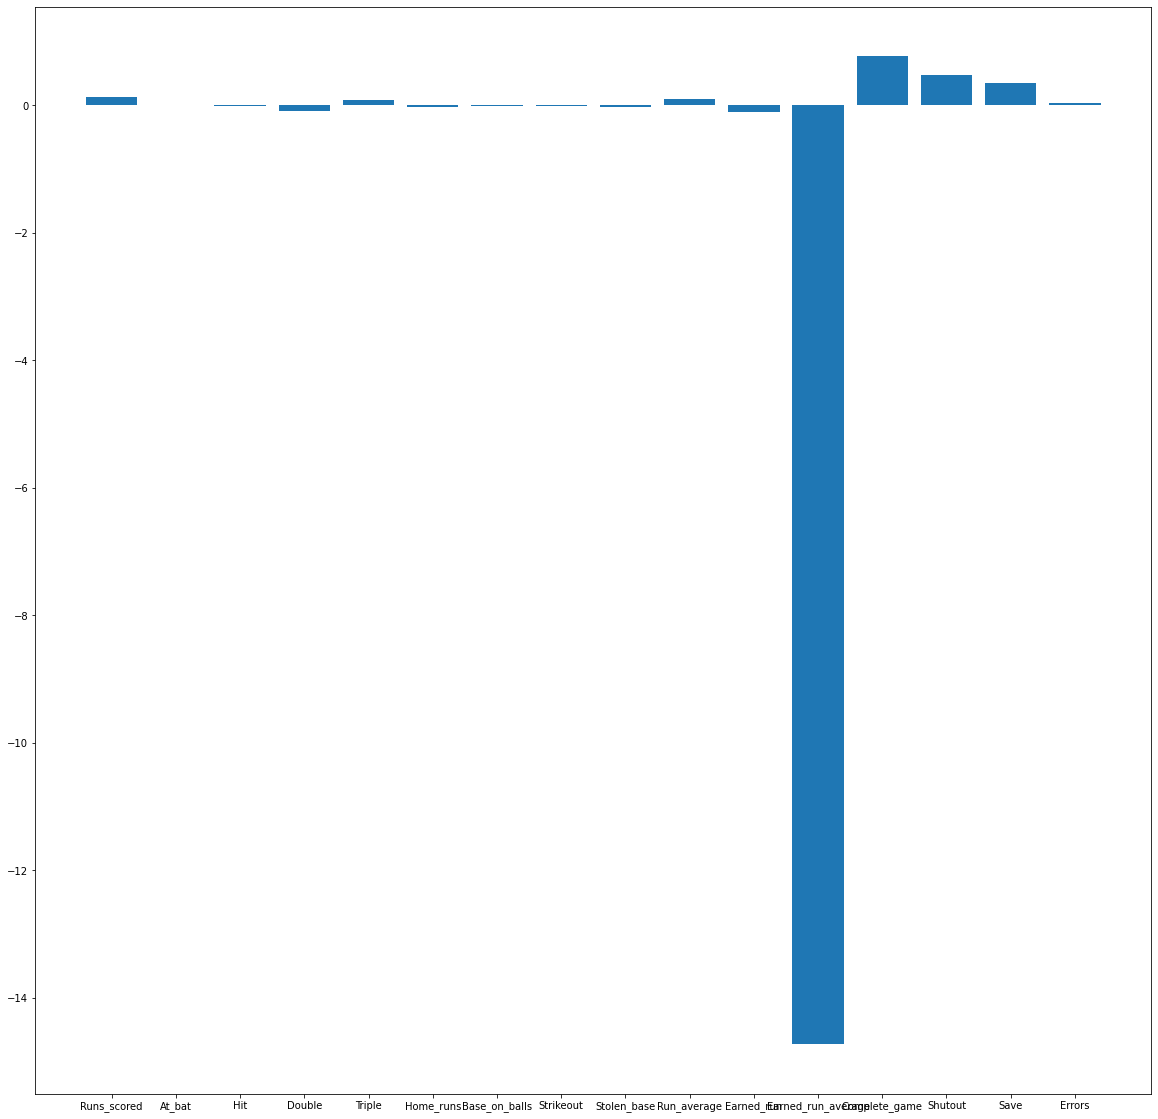

In [63]:
plt.figure(figsize=(20,20))
plt.bar(x.columns,ls.coef_)
plt.show()           

In [64]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9779859767851522

In [65]:
rd.coef_

array([ 1.34398638e-01, -3.32463494e-02,  1.05562307e-02, -8.34532502e-02,
        7.74785048e-02, -3.94636278e-02, -6.72943879e-03, -1.60353820e-02,
       -3.07017500e-02,  7.67779094e-02,  1.77161833e-01, -5.57194246e+01,
        5.77372268e-01,  4.88551874e-01,  2.34069338e-01,  4.64121725e-02])

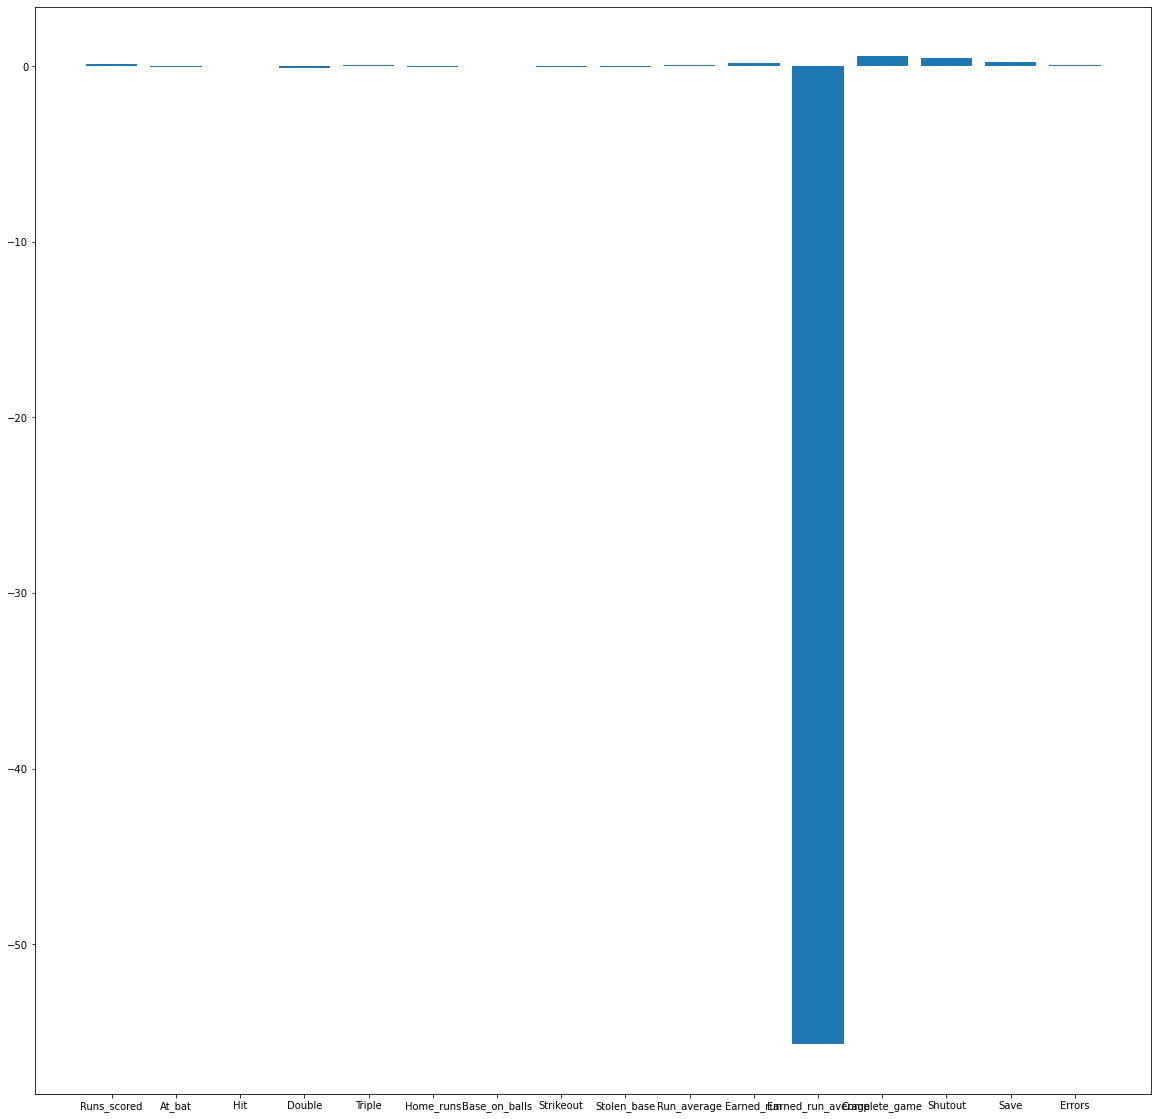

In [66]:
plt.figure(figsize=(20,20))
plt.bar(x.columns,rd.coef_)
plt.show() 

In [67]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.976988401242859


array([ 1.31641517e-01, -1.02619335e-03, -7.18876632e-03, -9.06857648e-02,
        8.54042012e-02, -3.91266158e-02, -9.33752752e-03, -1.27865379e-02,
       -2.32283360e-02,  9.21887172e-02, -1.07681953e-01, -1.32902057e+01,
        7.78646603e-01,  4.63210730e-01,  3.57370129e-01,  3.91264798e-02])

In [68]:
from sklearn.svm import SVR
kernellist=["linear"]
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8951789794288925


In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor

In [70]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print("DTC SCORE:",dtc.score(x_train,y_train))

dtcpredict=dtc.predict(x_test)
print("dtc r2_score:",r2_score(y_test,dtcpredict))
print("mean squared error of DTC:",mean_squared_error(y_test,dtcpredict))
print("root mean squared error of DTC:",np.sqrt(mean_squared_error(y_test,dtcpredict)))

DTC SCORE: 1.0
dtc r2_score: -0.2197967005499084
mean squared error of DTC: 73.2
root mean squared error of DTC: 8.555699854482976


In [71]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print("KNR SCORE:",knr.score(x_train,y_train))

knrpredict=knr.predict(x_test)
print("dtc r2_score:",r2_score(y_test,knrpredict))
print("mean squared error of DTC:",mean_squared_error(y_test,knrpredict))
print("root mean squared error of DTC:",np.sqrt(mean_squared_error(y_test,knrpredict)))

KNR SCORE: 0.627940199335548
dtc r2_score: 0.41369771704715863
mean squared error of DTC: 35.18400000000001
root mean squared error of DTC: 5.931610236689529


In [72]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(predrf)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predrf))

[81.24 71.82 91.14 75.27 79.22 85.03 83.85 76.05 83.39 85.48]
rf score: 0.9287182724252492
rf r2 score: 0.7864700883186138


In [73]:
from sklearn.ensemble import AdaBoostRegressor
#AdaBoostRegressor(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostRegressor(n_estimators=50,random_state=42)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(predad)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predad))

[80.5        68.         90.         76.         83.         90.
 87.         77.16666667 90.         90.        ]
rf score: 0.9287182724252492
rf r2 score: 0.5229498787239162


In [74]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(predgb)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predgb))

[80.72994251 71.8541538  91.92386169 75.9748584  77.18692667 83.21234367
 84.53615667 77.52269592 84.15248872 83.31124928]
rf score: 0.9287182724252492
rf r2 score: 0.713035429445209


In [75]:
#Hence we can see that above all the regression models, the Decision Tree regressor is giving us the best results. So we are saving this model 

In [76]:
import pickle
filename='pickleknnfile.pkl'
pickle.dump(dtc,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model.predict(x_test)

array([74., 78., 90., 74., 83., 90., 95., 78., 95., 90.])